<a href="https://colab.research.google.com/github/shounakd56/Detecting-Depression-through-Tweets/blob/main/Week%201/NLP_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
data=pd.read_csv("/content/gdrive/MyDrive/WiDS/NLP/Sentiment Analysis Dataset 2.csv",error_bad_lines=False)

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [7]:
data.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [8]:
data.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [9]:
data.drop(['ItemID','SentimentSource'],axis=1,inplace=True)


In [10]:
data

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!
1578608,1,"Zzzzzzz, sleep well people"
1578609,0,ZzzZzZzzzZ... wait no I have homework.
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [11]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
from nltk.corpus import stopwords

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [14]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_text']= data['SentimentText'].apply(lambda x:remove_punctuation(x))
data.head()

,Sentiment,SentimentText,clean_text
0,0,is so sad for my APL frie...,is so sad for my APL friend
1,0,I missed the New Moon trail...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT


In [15]:
data['low_clean_text']= data['clean_text'].apply(lambda x: x.lower())
data.head()

,Sentiment,SentimentText,clean_text,low_clean_text
0,0,is so sad for my APL frie...,is so sad for my APL friend,is so sad for my apl friend
1,0,I missed the New Moon trail...,I missed the New Moon trailer,i missed the new moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 o
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,omgaga im sooo im gunna cry ive be...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt


In [16]:
data['tokenized_text'] = data['low_clean_text'].apply(lambda x: x.split()) 

In [17]:
data

,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text
0,0,is so sad for my APL frie...,is so sad for my APL friend,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]"
1,0,I missed the New Moon trail...,I missed the New Moon trailer,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 o,"[omg, its, already, 730, o]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ..."
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]"
...,...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]"
1578608,1,"Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]"
1578609,0,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]"
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a..."


In [18]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [19]:
data['no_stopwords']= data['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [20]:
#defining a function for stemming
def stemming(text):
  stem_text = [stemmer.stem(word) for word in text]
  return stem_text
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))

In [21]:
#defining a function for lemmatizing
def lemmatizing(text):
  lemmatize_text = [lemmatizer.lemmatize(word) for word in text]
  return lemmatize_text
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x: lemmatizing(x))

In [22]:
data

,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_stemmed,msg_lemmatized
0,0,is so sad for my APL frie...,is so sad for my APL friend,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trail...,I missed the New Moon trailer,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]","[omg, already, 730]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis...","[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]"
...,...,...,...,...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]","[zzzzzz, final, night, tweeter]","[zzzzzz, finally, night, tweeter]"
1578608,1,"Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, peopl]","[zzzzzzz, sleep, well, people]"
1578609,0,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]"
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]"


In [23]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 40')

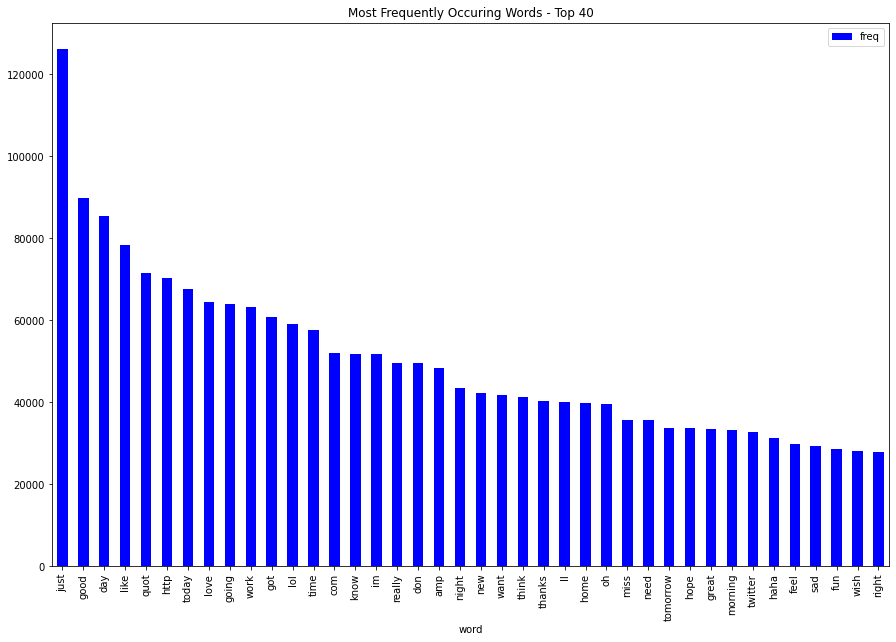

In [25]:
frequency.head(40).plot(x='word', y='freq', kind='bar', figsize=(15, 10), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 40")

Text(0.5, 1.0, 'WordCloud (Overall)')

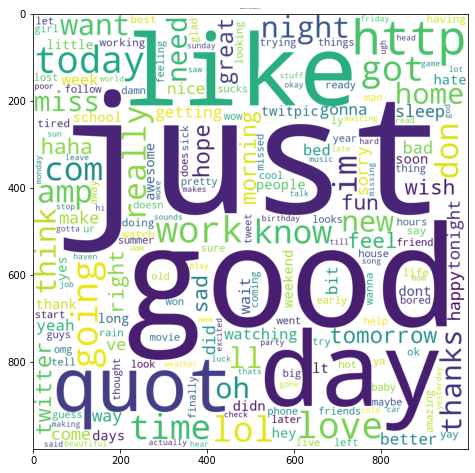

In [26]:
# WordCloud for overall dataset

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud (Overall)", fontsize = 2)

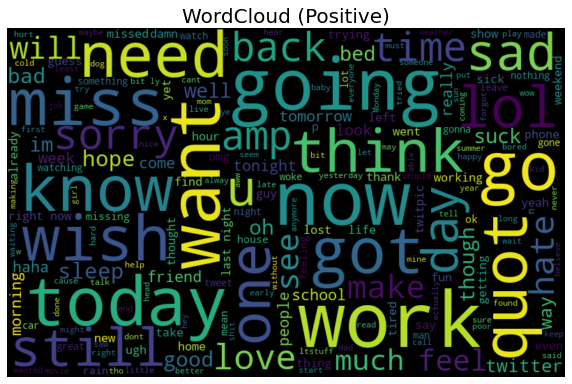

In [29]:
# WordCloud for Positive Tweets

positive_words =' '.join([text for text in data['SentimentText'][data['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (Positive)", fontsize = 20)
plt.show()

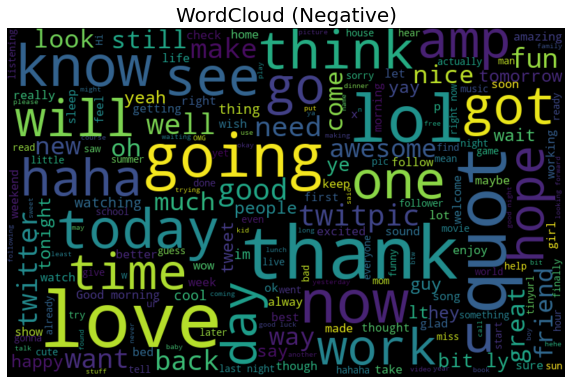

In [30]:
# WordCloud for Negative Tweets

negative_words =' '.join([text for text in data['SentimentText'][data['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (Negative)", fontsize = 20)
plt.show()

In [43]:
# Adding a column with length of the tweet
data['length'] = data['tokenized_text'].str.len()


In [44]:
data

,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_stemmed,msg_lemmatized,length
0,0,is so sad for my APL frie...,is so sad for my APL friend,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",7
1,0,I missed the New Moon trail...,I missed the New Moon trailer,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[missed, new, moon, trailer]",6
2,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]","[omg, already, 730]",5
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...",24
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",9
...,...,...,...,...,...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]","[zzzzzz, final, night, tweeter]","[zzzzzz, finally, night, tweeter]",4
1578608,1,"Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, peopl]","[zzzzzzz, sleep, well, people]",4
1578609,0,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]",6
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]",8


Number of Positve Tweets  =  788435
Number of Negative Tweets =  790177


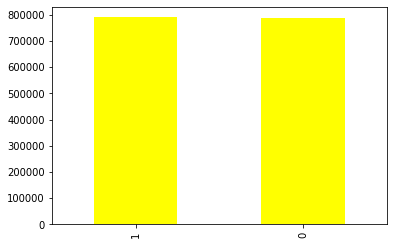

In [45]:
# Count Plot
data['Sentiment'].value_counts().plot.bar(color = 'yellow', figsize = (6, 4))
print('Number of Positve Tweets  = ' ,len(data['Sentiment'][data.Sentiment == 0]))
print('Number of Negative Tweets = ' ,len(data['Sentiment'][data.Sentiment == 1]))

In [46]:
# First 5 Depressing Teeets
data[data['Sentiment'] == 1].head(5)


,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_stemmed,msg_lemmatized,length
2,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]","[omg, already, 730]",5
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin,juuuuuuuuuuuuuuuuussssst chillin,"[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]",2
8,1,handed in my uniform today . i miss you ...,handed in my uniform today i miss you a...,handed in my uniform today i miss you a...,"[handed, in, my, uniform, today, i, miss, you,...","[handed, uniform, today, miss, already]","[hand, uniform, today, miss, alreadi]","[handed, uniform, today, miss, already]",9
9,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number,hmmmm i wonder how she my number,"[hmmmm, i, wonder, how, she, my, number]","[hmmmm, wonder, number]","[hmmmm, wonder, number]","[hmmmm, wonder, number]",7
11,1,thanks to all the haters up in my face a...,thanks to all the haters up in my face a...,thanks to all the haters up in my face a...,"[thanks, to, all, the, haters, up, in, my, fac...","[thanks, haters, face, day, 112102]","[thank, hater, face, day, 112102]","[thanks, hater, face, day, 112102]",12


In [47]:
# First 5 Non-Depressing Teeets
data[data['Sentiment'] == 0].head(5)


,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_stemmed,msg_lemmatized,length
0,0,is so sad for my APL frie...,is so sad for my APL friend,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",7
1,0,I missed the New Moon trail...,I missed the New Moon trailer,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[missed, new, moon, trailer]",6
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...",24
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",9
5,0,or i just worry too much?,or i just worry too much,or i just worry too much,"[or, i, just, worry, too, much]","[worry, much]","[worri, much]","[worry, much]",6


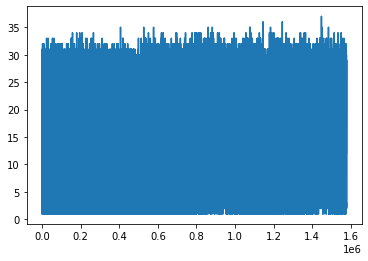

In [48]:
# Plot for Number of words in each Positive Tweet 
plt.plot(data['length'][data.Sentiment == 0])

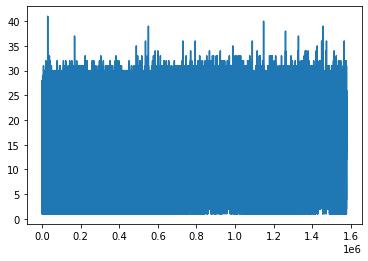

In [51]:
# Plot for Number of words in each Negative Tweet 
plt.plot(data['length'][data.Sentiment == 1])

In [59]:
# Negative Tweet of max length
data[data['length']==data['length'].max()]


,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_stemmed,msg_lemmatized,length
28756,1,@ajayrochester DO IT DO IT DO IT DO IT DO IT D...,ajayrochester DO IT DO IT DO IT DO IT DO IT DO...,ajayrochester do it do it do it do it do it do...,"[ajayrochester, do, it, do, it, do, it, do, it...",[ajayrochester],[ajayrochest],[ajayrochester],41


In [61]:
# Positive Tweet of max length
data[data['length']==data['length'][data.Sentiment==0].max()][data.Sentiment==0]


<ipython-input-61-2c980fbcd7f2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['length']==data['length'][data.Sentiment==0].max()][data.Sentiment==0]


,Sentiment,SentimentText,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_stemmed,msg_lemmatized,length
1448425,0,"I never get 2 c u as often as I like,I never g...",I never get 2 c u as often as I likeI never ge...,i never get 2 c u as often as i likei never ge...,"[i, never, get, 2, c, u, as, often, as, i, lik...","[never, get, 2, c, u, often, likei, never, get...","[never, get, 2, c, u, often, likei, never, get...","[never, get, 2, c, u, often, likei, never, get...",37
